In [1]:
#this use for classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv("dataset/SocialNetworkAds.csv")

In [4]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
X = dataset.iloc[:, [2, 3]].values

In [6]:
Y = dataset.iloc[:, 4].values

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.fit_transform(x_test)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [10]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

C:\Users\DREAMWORLD\AppData\Local\Temp\ipykernel_5892\4265815847.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set ==j, 0], x_set[y_set == j, 1],


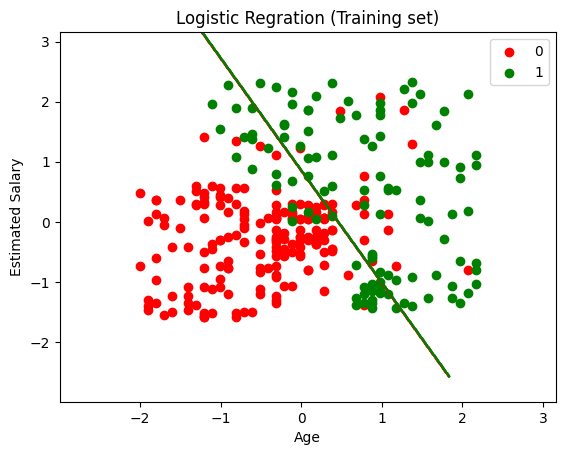

In [11]:
from matplotlib.colors import ListedColormap
x_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start= x_set[:, 0].min() - 1, stop= x_set[:, 0].max()+ 1, step= 0.01),
                    np.arange(start= x_set[:, 1].min() - 1, stop= x_set[:, 1].max()+ 1, step= 0.01))
plt.contour(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X1.min(), X1.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set ==j, 0], x_set[y_set == j, 1],
                c = ListedColormap(("red", "green"))(i), label = j)
plt.title("Logistic Regration (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()


In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start= x_set[:, 0].min() - 1, stop= x_set[:, 0].max()+ 1, step= 0.01),
                    np.arange(start= x_set[:, 1].min() - 1, stop= x_set[:, 1].max()+ 1, step= 0.01))
plt.contour(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X1.min(), X1.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set ==j, 0], x_set[y_set == j, 1],
                c = ListedColormap(("red", "green"))(i), label = j)
plt.title("Logistic Regration (Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()


In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 8, 24]], dtype=int64)